
<img src="./logo_UTN.svg" align="right" width="150" /> 
 Teoría de Circuitos II

# Trabajo semanal 14
#### Israel Pavelek

### 1) Ej. 11 TP Filtrado Clásico

Diseñe un atenuador de banda ancha que permita atenuar 30 dB intercalado en un cable coaxial de 75 ohms. 


* a) Obtenga una red que satisfaga los requerimientos.

* b) Verifique que el atenuador cumpla con la impedancia y atenuación prescrita. 

Dado que necesitamos una atencuanción de 30dB, son equivalente a 1000 veces:

$\frac{P2}{P1}=1000 veces$

$\gamma=\alpha+j\beta$

Como solo tenemos atenuación $\beta=0$

$e^{2\alpha}=1000$

$\alpha=\frac{ln(1000)}{2}=3.45$

Sabiendo que la matriz T de los parametros imagen solo teniendo en cuenta la atenuación corresponde a:


$\begin{pmatrix}
\sqrt{\frac{Z_{o1}}{Z_{o2}}}cosh (\alpha) & \sqrt{Z_{o1}\cdot Z_{o2}}sinh (\alpha) \\
\frac{sinh (\alpha)}{ \sqrt{Z_{o1}\cdot Z_{o2}}} & \sqrt{\frac{Z_{o2}}{Z_{o1}}}cosh (\alpha)
\end{pmatrix}$

En el caso particular en donde $Z_{o1}=Z_{o1}=Z_o$


$\begin{pmatrix}
cosh (\alpha) & Z_o \cdot sinh (\alpha) \\
\frac{sinh (\alpha)}{Z_o} & cosh (\alpha)
\end{pmatrix}$

En nuestro caso $Z_o=75\Omega$

La matriz queda:

$\begin{pmatrix}
cosh (3.45) & 75\Omega \cdot sinh (3.45) \\
\frac{sinh (3.45)}{75\Omega} & cosh (3.45)
\end{pmatrix}$

$\begin{pmatrix}
15.76 & 1180.07 \\
0.209 & 15.76
\end{pmatrix}$

La red T la podemos pensar a partir de:

$T=\begin{pmatrix}
A & B \\
C & D
\end{pmatrix}$



<img src="./Z.png" align="left" width="100" />

$\begin{bmatrix}
1 & Z\\
0 & 1
\end{bmatrix}$

.

.



<img src="./Y.png" align="left" width="75" /> 

$\begin{bmatrix}
1 & 0\\
Y & 1
\end{bmatrix}$

.

.


Nuestra red la podemos entender como la interconexión de estos cuadripolos:

<img src="./red.png" align="center" width="400" /> 


$T=T_1 \cdot T_2 \cdot T_3$

$T=\begin{bmatrix}
1 & Z_1\\
0 & 1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & 0\\
Y_2 & 1
\end{bmatrix}$
$\begin{bmatrix}
1 & Z_3\\
0 & 1
\end{bmatrix}$ 


$T=\begin{bmatrix}
1+Z_1Y_2 & Z_1\\
Y_2 & 1
\end{bmatrix}$ 
$\begin{bmatrix}
1 & Z_3\\
0 & 1
\end{bmatrix}$ 

$T=\begin{bmatrix}
1+Z_1Y_2 & Z_3+Z_1Z_3Y_2+Z_1\\
Y_2 & Y_1Z_3+1
\end{bmatrix}$ 

Entonces:


$\begin{pmatrix}
\sqrt{\frac{Z_{o1}}{Z_{o2}}}cosh (\alpha) & \sqrt{Z_{o1}\cdot Z_{o2}}sinh (\alpha) \\
\frac{sinh (\alpha)}{ \sqrt{Z_{o1}\cdot Z_{o2}}} & \sqrt{\frac{Z_{o2}}{Z_{o1}}}cosh (\alpha)
\end{pmatrix}=\begin{bmatrix}
1+Z_1Y_2 & Z_3+Z_1Z_3Y_2+Z_1\\
Y_2 & Y_1Z_3+1
\end{bmatrix}$ 



$Z_2=\frac{1}{Y_2}=\frac{ \sqrt{Z_{o1}\cdot Z_{o2}}}{sinh (\alpha)}$

$1+Z_1Y_2=\sqrt{\frac{Z_{o1}}{Z_{o2}}}cosh (\alpha)$

$Z_1=Z_2(\sqrt{\frac{Z_{o1}}{Z_{o2}}}cosh (\alpha)) -Z_2$

Reemplanzando:

$Z_1=\frac{ \sqrt{Z_{o1}\cdot Z_{o2}}}{sinh (\alpha)}[\sqrt{\frac{Z_{o1}}{Z_{o2}}}cosh (\alpha)] -\frac{ \sqrt{Z_{o1}\cdot Z_{o2}}}{sinh (\alpha)}$

Simplificando:

$Z_1=\frac{Z_{o1} cosh (\alpha)-\sqrt{Z_{o1}Z_{o2}}}{sinh (\alpha)}$


$Y_1Z_3+1=\sqrt{\frac{Z_{o2}}{Z_{o1}}}cosh (\alpha)$

Despejando obtenemos:

$Z_3=\frac{Z_{o2} cosh (\alpha)-\sqrt{Z_{o1}Z_{o2}}}{sinh (\alpha)}$


Nos queda entonces:

$$Z_1=\frac{Z_{o1} cosh (\alpha)-\sqrt{Z_{o1}Z_{o2}}}{sinh (\alpha)}$$

$$Z_2=\frac{ \sqrt{Z_{o1}\cdot Z_{o2}}}{sinh (\alpha)}$$

$$Z_3=\frac{Z_{o2} cosh (\alpha)-\sqrt{Z_{o1}Z_{o2}}}{sinh (\alpha)}$$

En nuestro caso como $Zo1=Zo2$ $Z_1=Z_3$

In [92]:
###Calculamos

import numpy as np

def calculo_att(att,Zo1,Zo2,mostrar):
    alpha=np.log(10**(att/10))/2
    if(Zo1==Zo2):
        print("La red es simetrica por lo tanto Z1=Z3")
    Z1=(Zo1*np.cosh(alpha)-np.sqrt(Zo1*Zo2))/(np.sinh(alpha))
    Z3=(Zo2*np.cosh(alpha)-np.sqrt(Zo1*Zo2))/(np.sinh(alpha))
    Z2=np.sqrt(Zo1*Zo2)/np.sinh(alpha)
    if(mostrar==1):
        print("Alpha=",alpha.round(2))
        print("Z1",Z1.round(2),"Ω")
        print("Z2",Z2.round(2),"Ω")
        print("Z3",Z3.round(2),"Ω")
        
    return(alpha,Z1,Z2,Z3)
    
calculo_att(30,75,75,mostrar=1)


La red es simetrica por lo tanto Z1=Z3
Alpha= 3.45
Z1 70.4 Ω
Z2 4.75 Ω
Z3 70.4 Ω


(3.4538776394910684, 70.40198549524268, 4.748164654907477, 70.40198549524268)

### Simulaciones:

Impedancia de entrada:

<img src="./Zin1.png" align="center" width="400" /> 

Transferencia de potencia:

<img src="./potencia1.png" align="center" width="400" /> 




### 2) Ej. 12 TP Filtrado Clásico (Ampliado)

Diseñe un acoplador/atenuador de banda ancha que permita interconectar un cable coaxil de 75 Ω a otro de 50 Ω. Es decir, la red en su entrada deberá permitir la conexión una ZI1=75Ω y en su salida ZI2=50Ω de impedancia característica.

* a) Obtenga una red que satisfaga los requerimientos y atenúe 5.72 dB en potencia.

* b) Verifique que el atenuador cumpla con la impedancia y atenuación prescrita. 

* c) ¿Podría dicha red acoplar sin atenuar? 

* d) Si la atenuación requerida fuera de 80 dB, ¿cómo cambiaría la red calculada en a)? Proponga una solución en caso que no se pueda implementar.



Utilizando los mismos conceptos que en el ejercicio anterior: Sabemos que:
        
        

In [93]:
calculo_att(5.75,75,50,mostrar=1)


Alpha= 0.66
Z1 43.3 Ω
Z2 86.08 Ω
Z3 0.18 Ω


(0.661993214235788, 43.30180172454294, 86.0780603492549, 0.17518103327698684)

Vemos que $Z_3$ es muuy chico por lo tanto vamos a simular con $Z_3=0$

### Simulaciones:

Impedancia de entrada:

<img src="./Zin2.png" align="center" width="400" /> 

Transferencia de potencia:

<img src="./potencia2.png" align="center" width="400" /> 


Esta red no podria adaptar sin atenuar, exceptuando que lo haga para una sola frecuencia, dado que para no atenuar no deberia estar compuestos por elementos con resistores, deberian ser todos tanques resonantes, en donde su comportamiento y condición de adaptación funcionaria a una sola frecuencio, y no seria más de banda ancha.


### Para lograr atenuar 80dB con la misma red

In [94]:
calculo_att(80,75,50,mostrar=1)


Alpha= 9.21
Z1 74.99 Ω
Z2 0.01 Ω
Z3 49.99 Ω


(9.210340371976184, 74.98775405116363, 0.01224744883639037, 49.98775355116362)

En este caso al quedar la impendancia Z2 igual a cero, no nos queda una red que carece de sentido.

Para solucionar este problema, en lugar de lograr con una sola red los 80 dB de atenuación podemos colocar N celdas en casacada. 

Ya que tenemos calculado todo para la atenuación de 5.72dB:

Como 
$(\frac{P2}{P1})^N=10^8$ 

Si tomo que $\frac{P2}{P1}=5.72dB=>3.73veces$

$N=\frac{log(10^8)}{log(3.73)}=\frac{8\cdot log(10)}{log(3.73)}=14$ etapas

Sabemos que con 14 celdas logramos los 80 dB

Pero vamos a analizar si podemos tener un poco más de atenuación en cada etapa, y lograr tener menos etapas en cascada. Para eso analizamos las expresiones de las impedancias a ver cuando Z2 comienza a acercarse a 0.



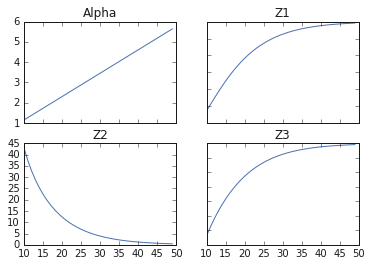

In [95]:

Alpha=[]
Z1=[]
Z2=[]
Z3=[]
mayor_att=50
min_att=10
for att in range(min_att,mayor_att):
    alpha,z1,z2,z3=calculo_att(att,75,50,mostrar=0)
    Alpha.append(alpha)
    Z1.append(z1)
    Z2.append(z2)
    Z3.append(z3)
    

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = range(min_att,mayor_att)

fig, axs = plt.subplots(2,2)
# plot lines
axs[0, 0].set_title('Alpha')
axs[0, 0].plot(x, Alpha,)
axs[0, 1].set_title('Z1')
axs[0, 1].plot(x, Z1, label = "Z1")
axs[1, 0].set_title('Z2')
axs[1, 0].plot(x, Z2, label = "Z2")
axs[1, 1].set_title('Z3')
axs[1, 1].plot(x, Z3, label = "Z3")

for ax in axs.flat:
    ax.label_outer()

In [96]:
calculo_att(20,75,50,mostrar=1)

Alpha= 2.3
Z1 64.14 Ω
Z2 12.37 Ω
Z3 38.64 Ω


(2.302585092994046, 64.14399119806475, 12.371160317086757, 38.63894069301425)

En este caso al tomar los 20dB

Como 
$(\frac{P2}{P1})^N=10^8$ 

Si tomo que $\frac{P2}{P1}=20dB=>100veces$

$N=\frac{log(10^8)}{log(100)}=\frac{8\cdot log(10)}{2\cdot log(10)}=4$ etapas

<img src="./potencia3.png" align="center" width="800" /> 

<img src="./Zin3.png" align="center" width="800" /> 